# (prosperLoanData)
## by (Hossam Sherif Mohamed)

## Investigation Overview

> My goal is to find the features that mostly affect the main features of interest which are ProsperScore and ProsperRating

## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
loan_df=pd.read_csv('prosperLoanData.csv')
print(loan_df.shape)
loan_df.head()

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
loan_df_updated=loan_df[['Term','LoanStatus','BorrowerAPR','BorrowerRate','LenderYield',
                         'EstimatedReturn','ProsperScore','ProsperRating (Alpha)','EmploymentStatus','StatedMonthlyIncome'
                        ,'LoanOriginalAmount']]
loan_df_updated.shape

(113937, 11)

In [5]:
loan_df_updated.dropna(inplace=True)
loan_df_updated.drop_duplicates(inplace=True)
loan_df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81958 entries, 1 to 113936
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Term                   81958 non-null  int64  
 1   LoanStatus             81958 non-null  object 
 2   BorrowerAPR            81958 non-null  float64
 3   BorrowerRate           81958 non-null  float64
 4   LenderYield            81958 non-null  float64
 5   EstimatedReturn        81958 non-null  float64
 6   ProsperScore           81958 non-null  float64
 7   ProsperRating (Alpha)  81958 non-null  object 
 8   EmploymentStatus       81958 non-null  object 
 9   StatedMonthlyIncome    81958 non-null  float64
 10  LoanOriginalAmount     81958 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 7.5+ MB


## (Distribution of ProsperRating)

### We can notice here that the most common prosper rating is C , and we also can see that the distribution of ProsperRating is approximately normally distributed

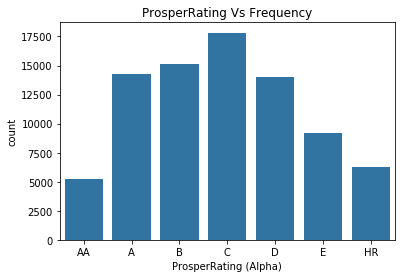

In [10]:
order_toshow=['AA','A','B','C','D','E','HR']
base = sb.color_palette()[0]
sb.countplot(data=loan_df_updated, x='ProsperRating (Alpha)',color=base ,order=order_toshow);
plt.title("ProsperRating Vs Frequency");

## (EmploymentStatus vs ProsperScore)

### We can see that the empolyed status that in common has the highest ProsperScore is Full-time than part-time and Retired , and the one with the least prosper score is the Self-employed

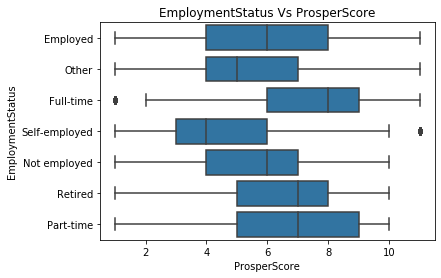

In [11]:
base = sb.color_palette()[0]
sb.boxplot(data=loan_df_updated, y='EmploymentStatus', x='ProsperScore', color=base);
plt.title("EmploymentStatus Vs ProsperScore");

## (ProsperScore vs Term)

### We can see that the individuals with the 12 month term loan seems to have a higher prosper score median than others

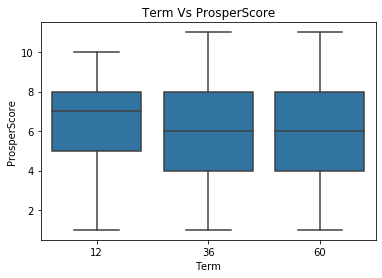

In [12]:
base = sb.color_palette()[0]
sb.boxplot(data=loan_df_updated, x='Term', y='ProsperScore', color=base);
plt.title("Term Vs ProsperScore");